In [ ]:
import pandas as pd
import numpy as np
import time

import random
from sklearn.model_selection import train_test_split

import sys
sys.path.append("..")

#For content based recommendation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import nltk
import re
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/ty2020/reco.csv.gz')

In [ ]:
df = df[df.index < 55000]

In [ ]:
df.head()

,partition_date,orderparentid,user_id,productcontentid,brand_id,category_id,category_name,gender,price,color_id,business_unit,ImageLink
0,20.08.2020 06:00,335057357,86386,39328996,919155,418,Sandalet,Kadın,319.98,14.0,Branded Shoes B,https://cdn.dsmcdn.com//ty1/product/media/imag...
1,24.08.2020 10:00,337401625,59469,31903343,121,1827,Banyo Dolabı,Unisex,1195.56,3.0,Bahçe & Yapı Market & Hırdavat,https://cdn.dsmcdn.com//assets/product/media/i...
2,26.08.2020 19:00,338457012,51248,34726400,40,604,T-Shirt,Kadın,37.99,14.0,PL Woman,https://cdn.dsmcdn.com//assets/product/media/i...
3,22.08.2020 11:00,336681542,29380,32920640,7651,604,T-Shirt,Kadın,24.99,6.0,Kadın A,https://cdn.dsmcdn.com//assets/product/media/i...
4,20.08.2020 19:00,335736916,68368,39035716,3395,599,Kazak,Kadın,79.90,16.0,Kadın A,https://cdn.dsmcdn.com//ty1/product/media/imag...


**TASK-14A:** Please find the 5 most frequent ones for the following columns:

user_id
productcontent_id
brand_id
category_id
color_id

Text(0.5, 1.0, 'Top 5 User')

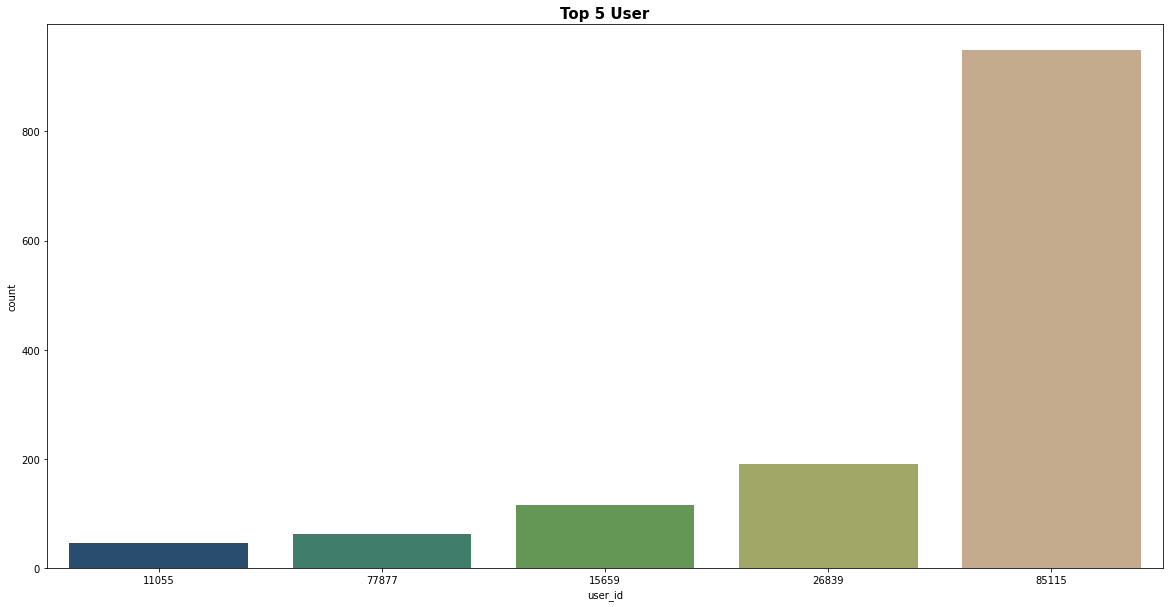

In [ ]:
# user_id 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.countplot(x='user_id', data=df, palette='gist_earth',
             order=df['user_id'].value_counts()[:5]\
             .sort_values().index).set_title("Top 5 User", fontsize=15,
                                             weight='bold')

Text(0.5, 1.0, 'Top 5 Product')

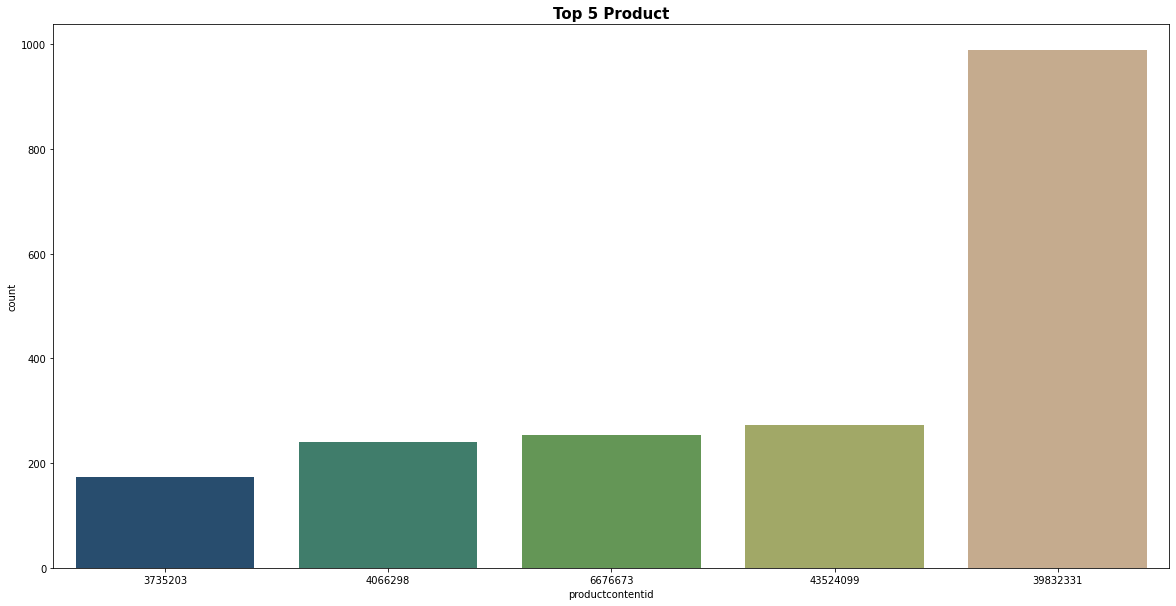

In [ ]:
# productcontentid 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
sns.countplot(x='productcontentid', data=df, palette='gist_earth',
             order=df['productcontentid'].value_counts()[:5]\
             .sort_values().index).set_title("Top 5 Product", fontsize=15,
                                             weight='bold')

Text(0.5, 1.0, 'Top 5 Brand')

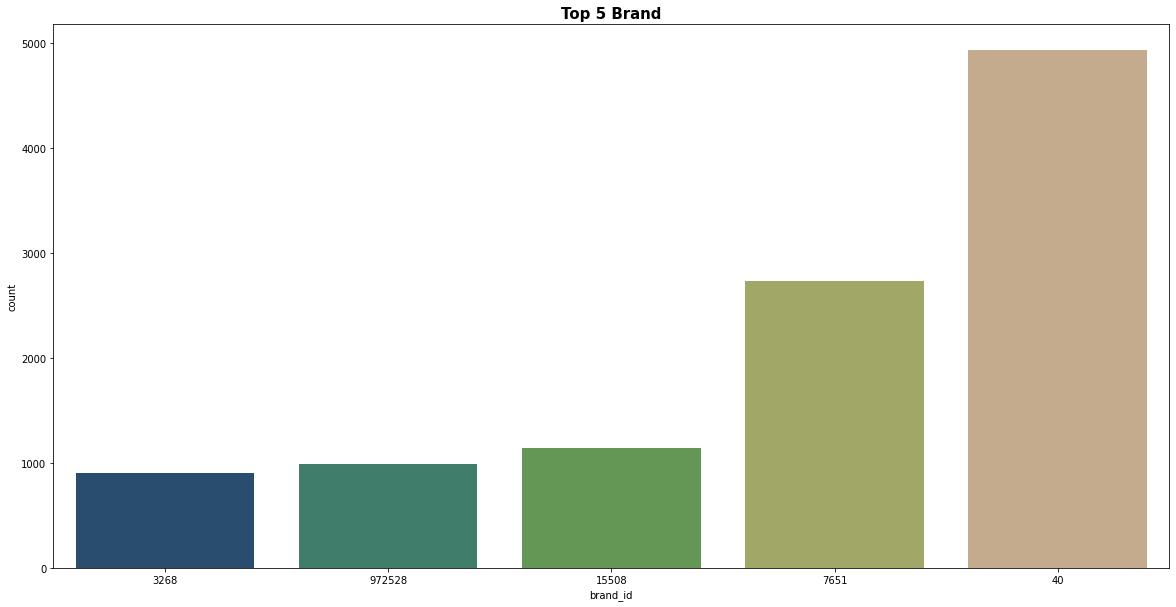

In [ ]:
# brand _id
plt.figure(figsize=(20,10))
sns.countplot(x='brand_id', data=df, palette='gist_earth',
             order=df['brand_id'].value_counts()[:5]\
             .sort_values().index).set_title("Top 5 Brand", fontsize=15,
                                             weight='bold')

Text(0.5, 1.0, 'Top 5 Category')

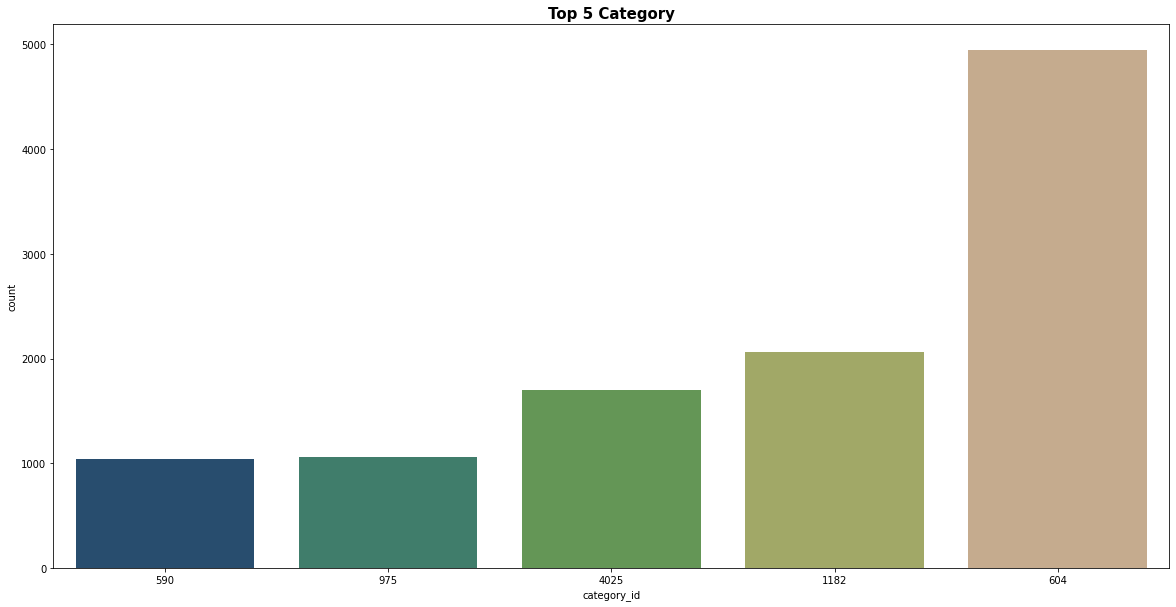

In [ ]:
# category_id
plt.figure(figsize=(20,10))
sns.countplot(x='category_id', data=df, palette='gist_earth',
             order=df['category_id'].value_counts()[:5]\
             .sort_values().index).set_title("Top 5 Category", fontsize=15,
                                             weight='bold')

Text(0.5, 1.0, 'Top 5 Color')

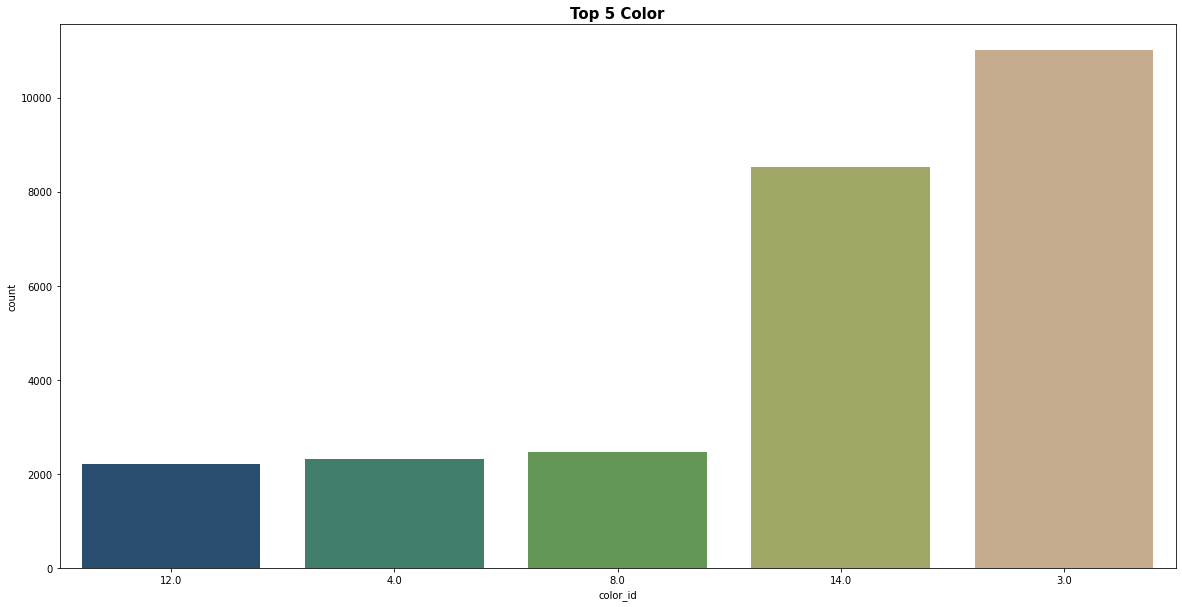

In [ ]:
# color_id
plt.figure(figsize=(20,10))
sns.countplot(x='color_id', data=df, palette='gist_earth',
             order=df['color_id'].value_counts().iloc[:5].sort_values().index).set_title("Top 5 Color", fontsize=15,
                                             weight='bold')

**TASK-14B:** Please provide histograms for the relevant columns and provide your comments very briefly.

Text(0.5, 1.0, 'User Id Distribution')

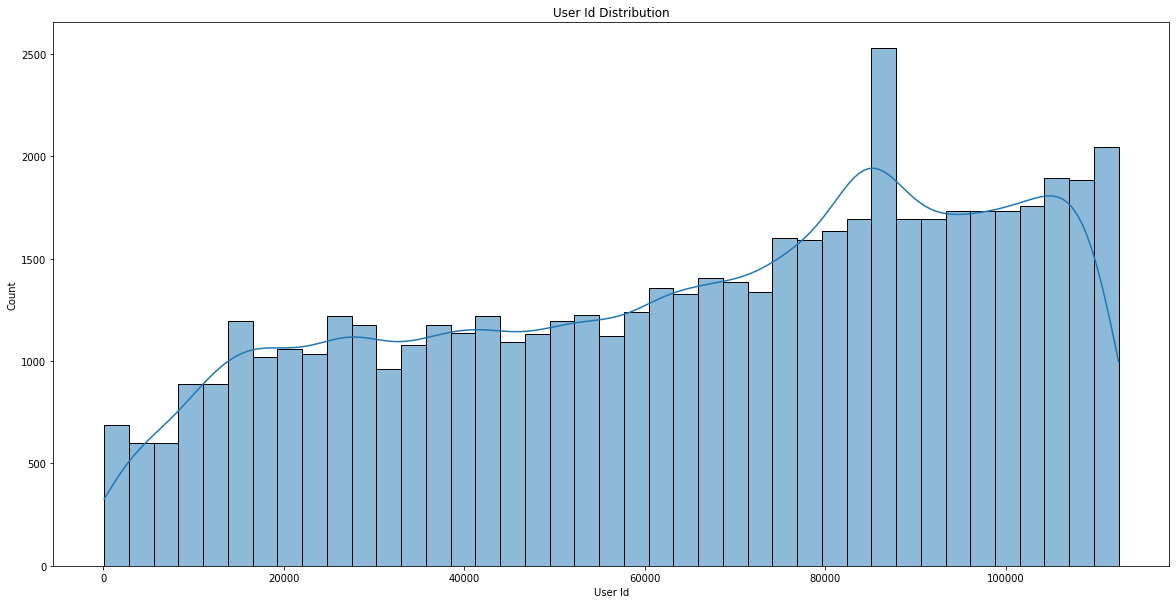

In [ ]:
# user_id
plt.figure(figsize=(20,10))
sns.histplot(data=df, x="user_id", kde=True)
plt.xlabel("User Id")
plt.title("User Id Distribution")
# Although there are prominent columns, a growing distribution is seen in general. 
# Considering that users get their id numbers in order, we can assume that older people get the first numbers. 
# The higher rate of new generation people using and adapting to technology may have affected the distribution. 

Text(0.5, 1.0, ' Product Content Id Distribution')

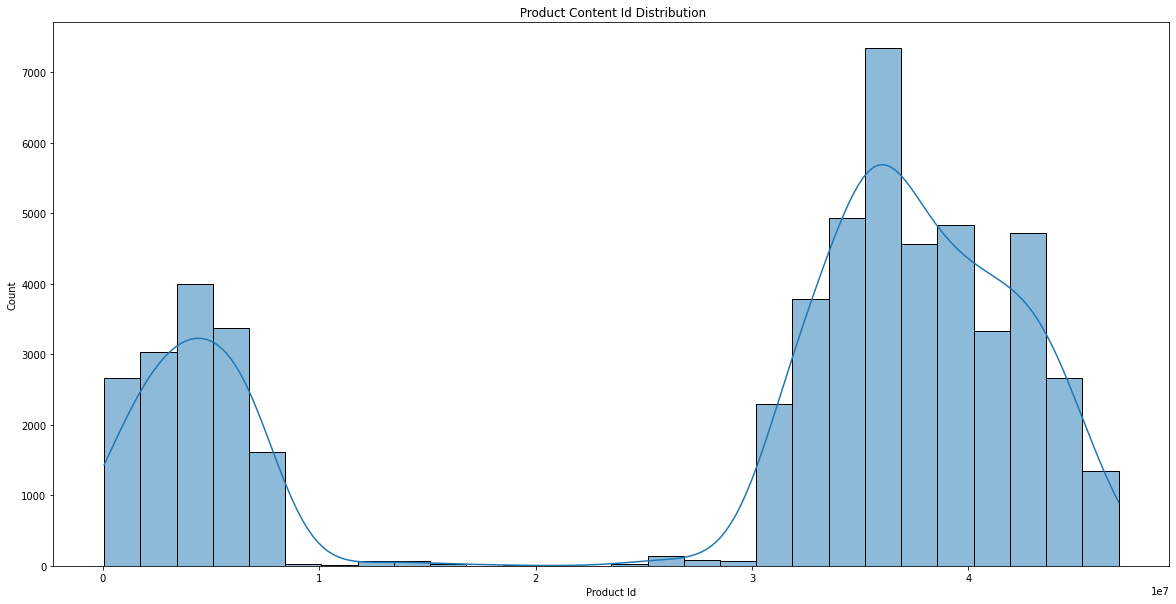

In [ ]:
# productcontentid
plt.figure(figsize=(20,10))
sns.histplot(data=df, x="productcontentid", kde=True)
plt.xlabel("Product Id")
plt.title(" Product Content Id Distribution")
# It is difficult to see the distribution as there are serious differences between the number of products purchased. 
# I will use log transformation method in next cell to avoid this situation 

Text(0.5, 1.0, 'Product Content Id Distribution')

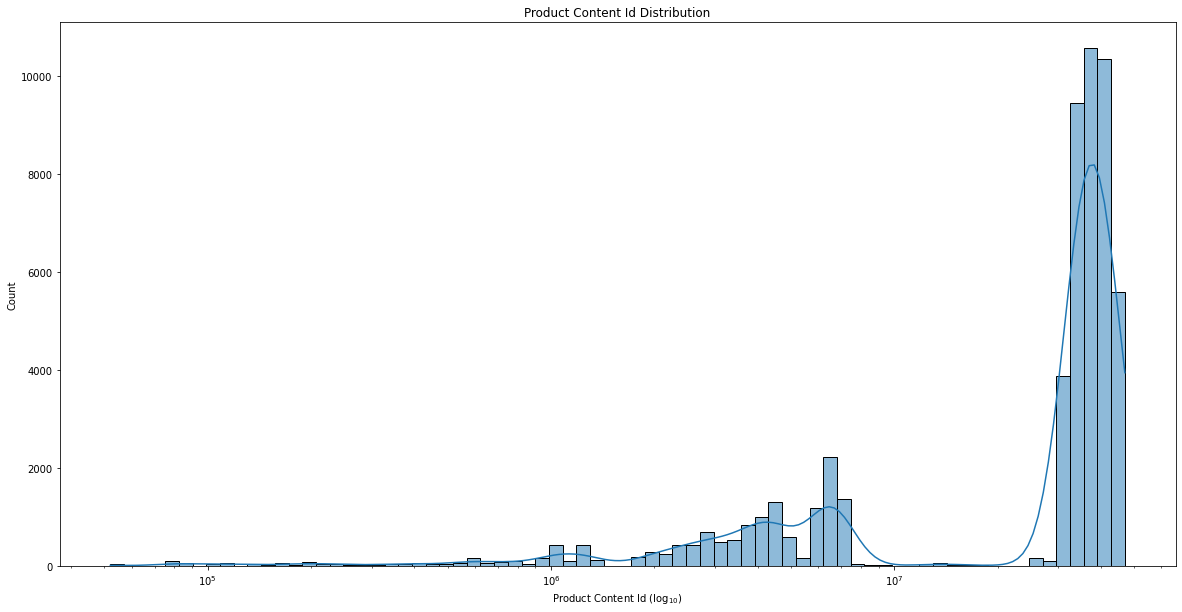

In [ ]:
# productcontentid log10
plt.figure(figsize=(20,10))
sns.histplot(data=df, x="productcontentid", kde=True, log_scale=10)
plt.xlabel("Product Content Id (log$_{10}$) ")
plt.title("Product Content Id Distribution")
# Despite the applied transformation method, an uneven distribution is observed. 
# Considering that the ids given to the products added by the sellers are given increasing numerical values in order, I think that a noticeable increase is observed in the distribution of the products because the recently added products are in line with the customer demands

Text(0.5, 1.0, 'Brand Id Distribution')

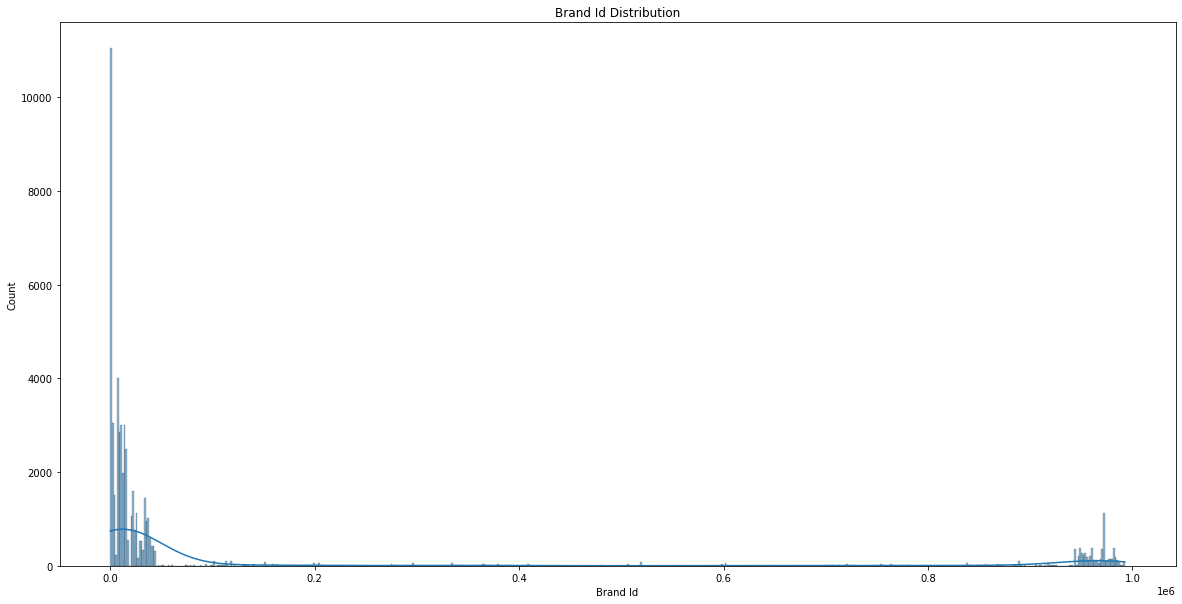

In [ ]:
# brand_id
plt.figure(figsize=(20,10))
sns.histplot(data=df, x="brand_id", kde=True)
plt.xlabel("Brand Id")
plt.title("Brand Id Distribution")
# It is difficult to see the distribution as there are serious differences between the number of brands. 
# I will use log transformation method in next cell to avoid this situation 

Text(0.5, 1.0, 'Brand Id Distribution')

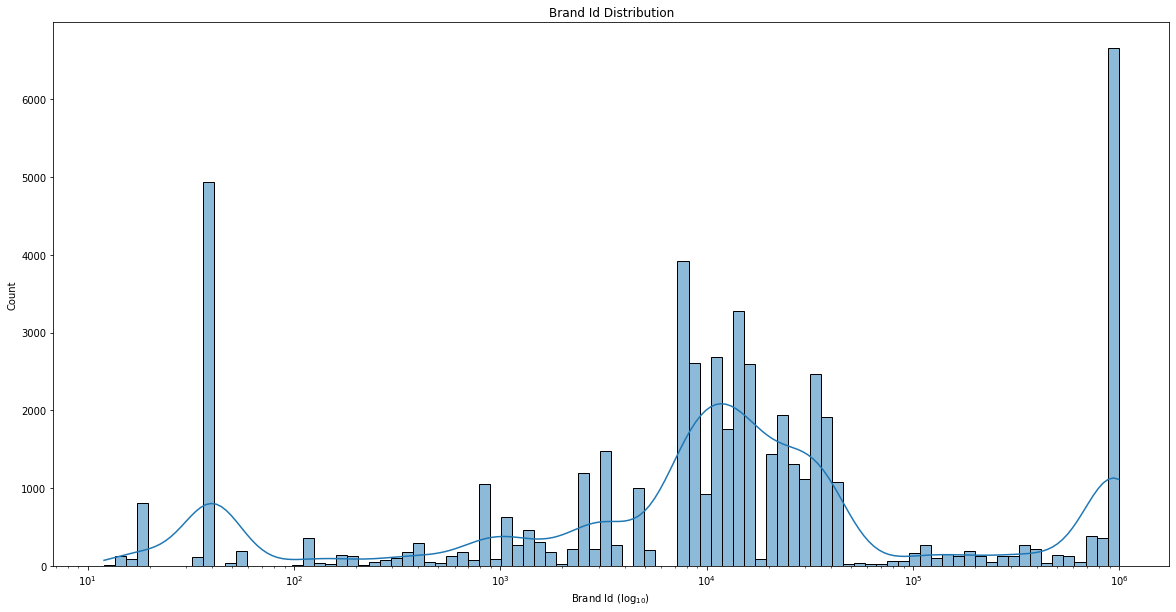

In [ ]:
# brand_id log10
plt.figure(figsize=(20,10))
sns.histplot(data=df, x="brand_id", kde=True, log_scale=10)
plt.xlabel("Brand Id (log$_{10}$) ")
plt.title("Brand Id Distribution")
# Although there are brands that cause noticeable deterioration at the beginning and at the end, we can say that there is a similar to normal distrubution. 

Text(0.5, 1.0, 'Category Id Distribution')

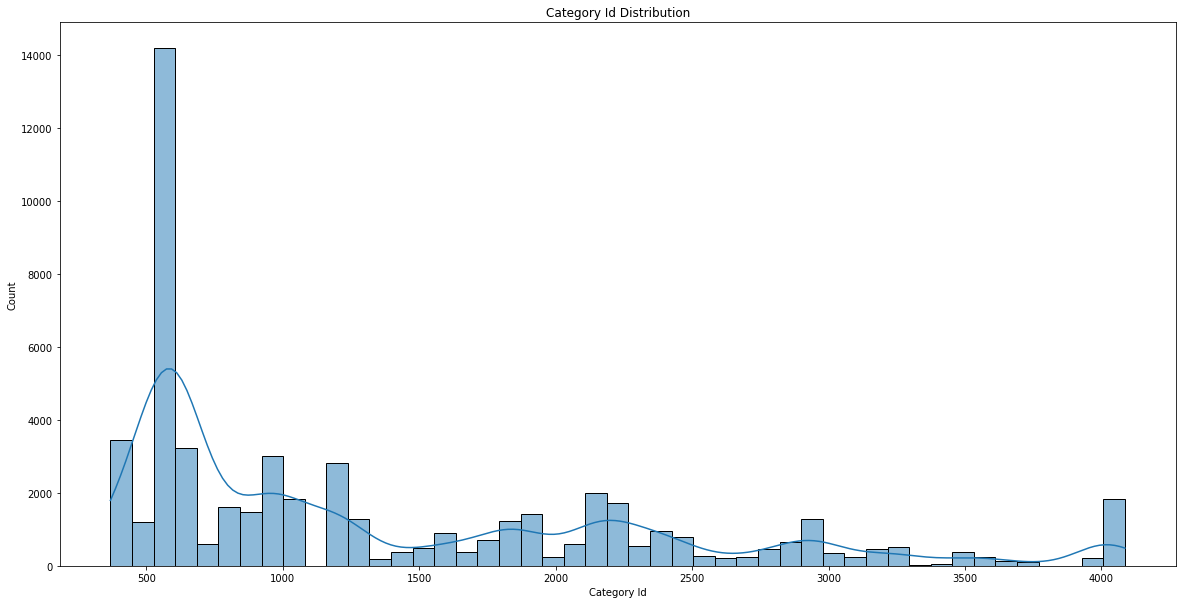

In [ ]:
# category_id 
plt.figure(figsize=(20,10))
sns.histplot(data=df, x="category_id", kde=True)
plt.xlabel("Category Id")
plt.title("Category Id Distribution")
# Observed  like a uniformdistribution even though there are outlier columns 
# Outlier columns may consist of these products, as consumables require repurchasing.  

Text(0.5, 1.0, 'Category Id Distribution')

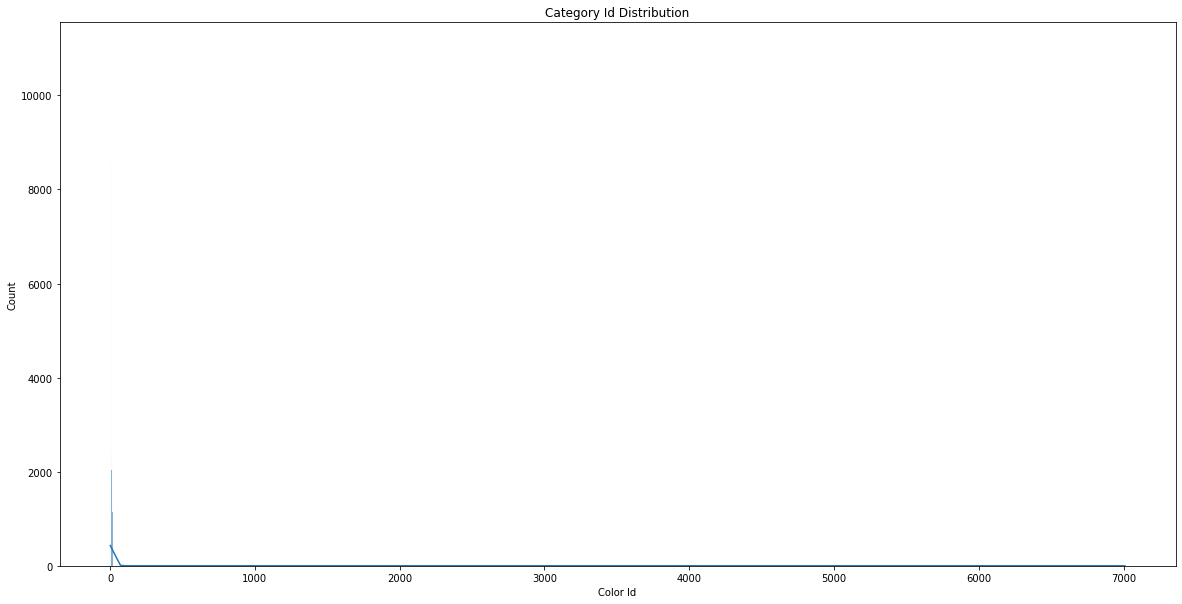

In [ ]:
# color_id
plt.figure(figsize=(20,10))
sns.histplot(data=df, x="color_id", kde=True)
plt.xlabel("Color Id")
plt.title("Category Id Distribution")
# It is difficult to see the distribution as there are serious differences between the number of color. 
# I will use log transformation method in next cell to avoid this situation 

Text(0.5, 1.0, 'Color Id Distribution')

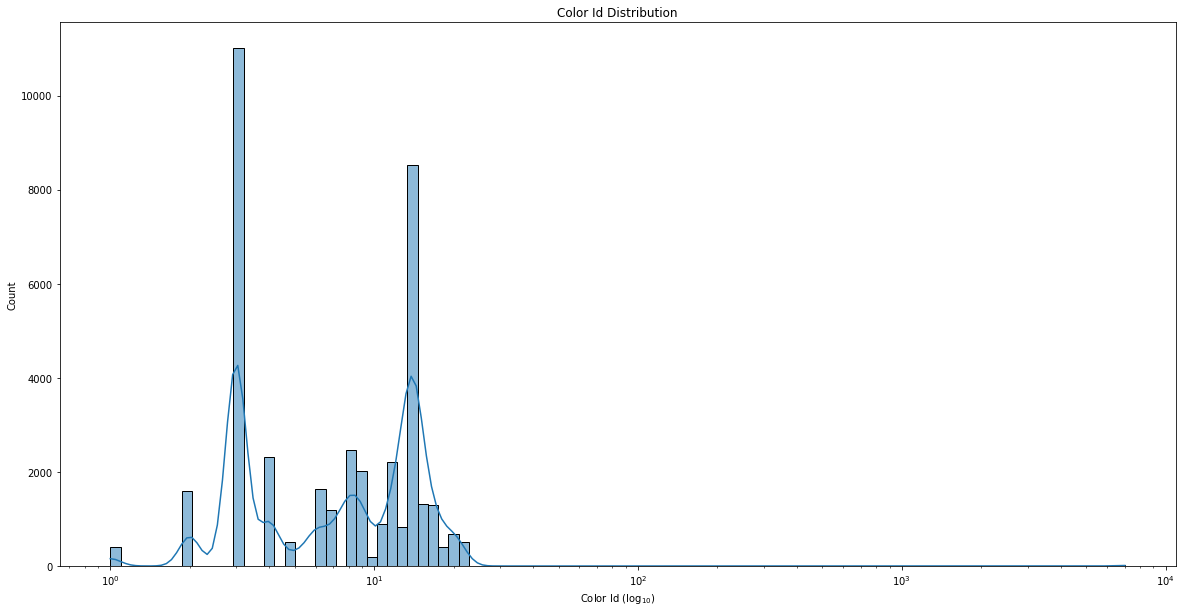

In [ ]:
# color_id log10
plt.figure(figsize=(20,10))
sns.histplot(data=df, x="color_id", kde=True, log_scale=10)
plt.xlabel("Color Id (log$_{10}$) ")
plt.title("Color Id Distribution")
# We observe that the colors in the first half of the graph are used more. Because giving the first id numbers for the main and familiar colors and using new id numbers for the fancy colors can cause the graphic to be formed in this way. 

**TASK-14C:** Please provide pivot table for illustrating the distribution of product genders with respect to the business units.

In [ ]:
product_gender_dist = df.pivot_table(index="gender",columns="business_unit",values="user_id",aggfunc='count')
product_gender_dist

business_unit,Aksesuar,Anne & Bebek Bakım,Aydınlatma,Bahçe & Yapı Market & Hırdavat,Bahçe Mobilyası,Banyo,Bebek Bezi & Mendil,Beyaz Eşya,Bilgisayar & Tablet & Aksesuarları,Books,Branded Shoes A,Branded Shoes B,Büyük Beden,Cep Telefonu & Aksesuarları,Cilt Bakım,Designer,Diğer Aksesuarlar,Elektrikli Ev Aletleri,Erkek A,Erkek B,Ev Bakım ve Temizlik,Ev Dekorasyon,Ev Gereçleri,Ev Giyim,Ev Tekstil,FMCG,Fantezi Giyim,Foto & Kamera,GAS,GAS Casual,GAS Denim,Gözlük A,Gözlük B,Gıda ve İçecek,Halı/Kilim,Hobi,Kadın A,Kadın B,Kids & Baby Fashion,Kitap & Kırtasiye & Yaşam,Kişisel Bakım,Kişisel Bakım Aletleri,Konservatif,Kırtasiye & Ofis,Luxury,Lüks & Tasarım,Makyaj,Mayo,Mücevher,Ofis Mobilyası,Oto Aksesuar,Outdoor,Outdoor Equipment,Oyun & Oyun Konsolları,Oyuncak,PL Ayakkabı,PL Beach,PL Designer,PL Erkek,PL Homewear,PL Party & Wedding,PL Woman,Parfüm,Petshop,Saat A,Saat B,Salon &Mutfak Mobilya,Saç Bakım,Sağlık,Sofra & Mutfak,Sport Equipment,Sportswear,Takı,Vücut Bakım,Yatak Oda Mobilyası,Çanta & Valiz,Çocuk Gereç,İç Giyim
gender,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Erkek,1.0,2.0,1.0,NaN,1.0,2.0,2.0,NaN,1.0,2.0,154.0,245.0,2.0,2.0,1.0,19.0,23.0,NaN,397.0,612.0,NaN,1.0,NaN,69.0,2.0,NaN,1.0,NaN,NaN,441.0,252.0,4.0,13.0,3.0,NaN,4.0,999.0,1.0,1360.0,NaN,75.0,69.0,NaN,NaN,13.0,NaN,1.0,14.0,NaN,NaN,4.0,38.0,1.0,NaN,24.0,NaN,NaN,NaN,1143.0,NaN,NaN,NaN,155.0,1.0,30.0,109.0,NaN,7.0,46.0,NaN,3.0,297.0,21.0,2.0,NaN,44.0,3.0,194.0
Kadın,NaN,10.0,NaN,4.0,2.0,72.0,NaN,1.0,NaN,4.0,342.0,1149.0,215.0,5.0,751.0,19.0,178.0,NaN,1.0,5.0,4.0,35.0,7.0,380.0,84.0,NaN,137.0,NaN,NaN,196.0,177.0,11.0,136.0,2.0,NaN,21.0,2363.0,3300.0,1513.0,NaN,371.0,58.0,234.0,8.0,22.0,1.0,1217.0,445.0,31.0,NaN,NaN,7.0,NaN,NaN,29.0,63.0,141.0,7.0,NaN,136.0,186.0,4410.0,313.0,NaN,19.0,87.0,1.0,375.0,23.0,40.0,3.0,259.0,803.0,153.0,NaN,419.0,16.0,913.0
Unisex,NaN,316.0,347.0,671.0,120.0,620.0,628.0,90.0,351.0,1182.0,24.0,276.0,13.0,940.0,697.0,5.0,174.0,305.0,1.0,71.0,426.0,920.0,824.0,43.0,834.0,1.0,8.0,56.0,1.0,17.0,13.0,26.0,185.0,674.0,146.0,465.0,18.0,135.0,253.0,2.0,1158.0,121.0,43.0,626.0,2.0,NaN,116.0,32.0,3.0,273.0,293.0,10.0,147.0,1.0,734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,600.0,18.0,97.0,442.0,428.0,859.0,2292.0,420.0,170.0,158.0,147.0,171.0,126.0,259.0,111.0


**TASK-14D:** Please provide the price histogram for the most frequent 3 category names separately.

In [ ]:
# Find top three product category name 
top_3_prod_categories = df.groupby('category_name')['price'].count().sort_values(ascending=False).head(3)
top_3_prod_categories

category_name
T-Shirt          4945
Elbise           2066
Medikal Maske    1696
Name: price, dtype: int64

In [ ]:
# Creates a new dataframe that include only top three category and other features from old df
top_3_product_df = pd.DataFrame()
for i in top_3_prod_categories.index:
   top_3_product_df = top_3_product_df.append(df[df["category_name"]==i])
top_3_product_df

,partition_date,orderparentid,user_id,productcontentid,brand_id,category_id,category_name,gender,price,color_id,business_unit,ImageLink
2,26.08.2020 19:00,338457012,51248,34726400,40,604,T-Shirt,Kadın,37.99,14.0,PL Woman,https://cdn.dsmcdn.com//assets/product/media/i...
3,22.08.2020 11:00,336681542,29380,32920640,7651,604,T-Shirt,Kadın,24.99,6.0,Kadın A,https://cdn.dsmcdn.com//assets/product/media/i...
34,17.08.2020 03:00,332533363,44828,35897978,3268,604,T-Shirt,Erkek,29.99,4.0,Kadın A,https://cdn.dsmcdn.com//assets/product/media/i...
36,26.08.2020 15:00,338368040,107557,37519197,18,604,T-Shirt,Kadın,24.99,3.0,GAS Denim,https://cdn.dsmcdn.com//assets/dev/product/med...
38,16.08.2020 20:00,332045154,73894,36862103,3268,604,T-Shirt,Erkek,29.99,14.0,Kadın A,https://cdn.dsmcdn.com//assets/product/media/i...
...,...,...,...,...,...,...,...,...,...,...,...,...
54833,19.08.2020 05:00,334130838,109172,43524099,961001,4025,Medikal Maske,NaN,25.00,NaN,Sağlık,https://cdn.dsmcdn.com//ty5/product/media/imag...
54854,12.08.2020 19:00,330475192,77338,44450229,951330,4025,Medikal Maske,NaN,128.98,NaN,Sağlık,https://cdn.dsmcdn.com//ty7/product/media/imag...
54913,10.08.2020 19:00,329671943,71403,43524099,961001,4025,Medikal Maske,NaN,25.00,NaN,Sağlık,https://cdn.dsmcdn.com//ty5/product/media/imag...
54920,23.08.2020 12:00,337049543,100755,43524099,961001,4025,Medikal Maske,NaN,24.49,NaN,Sağlık,https://cdn.dsmcdn.com//ty5/product/media/imag...


In [ ]:
top_3_product_df.category_name.unique() # Checks the new dataframe whether include only top 3 product category

array(['T-Shirt', 'Elbise', 'Medikal Maske'], dtype=object)

Text(0.5, 1.0, 'Price Distrubutions of Top 3 Product (log10) ')

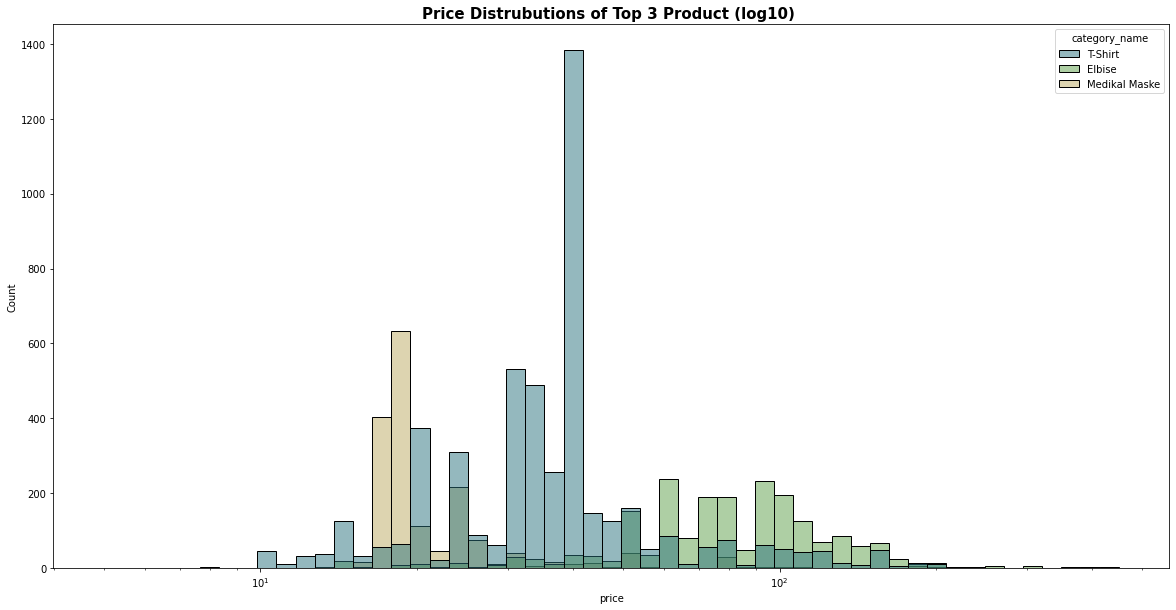

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Visualazation of the price histogram for the most frequent 3 category names separately. (log 10 transformation)
plt.figure(figsize=(20,10))
sns.histplot(x='price', data=top_3_product_df, palette='gist_earth',hue="category_name", log_scale=10)
plt.title("Price Distrubutions of Top 3 Product (log10) ", fontsize=15,
                                             weight='bold')

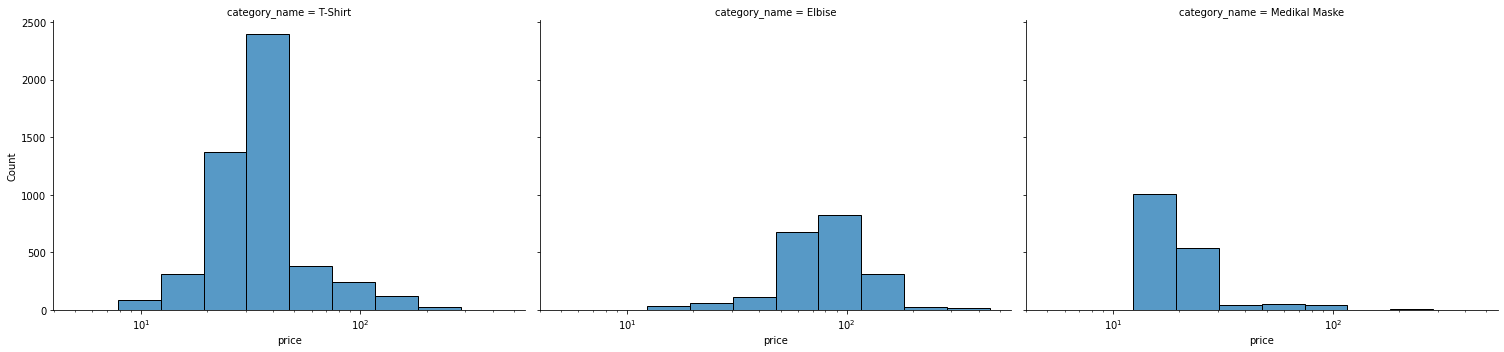

In [ ]:
# Visualazation of the price histogram for the most frequent 3 category names separately. (log 10 transformation)
sns.displot(
  data=top_3_product_df,
  x="price",
  col="category_name",
  kind="hist",
  aspect=1.4,
  log_scale=10,
  bins=10
)

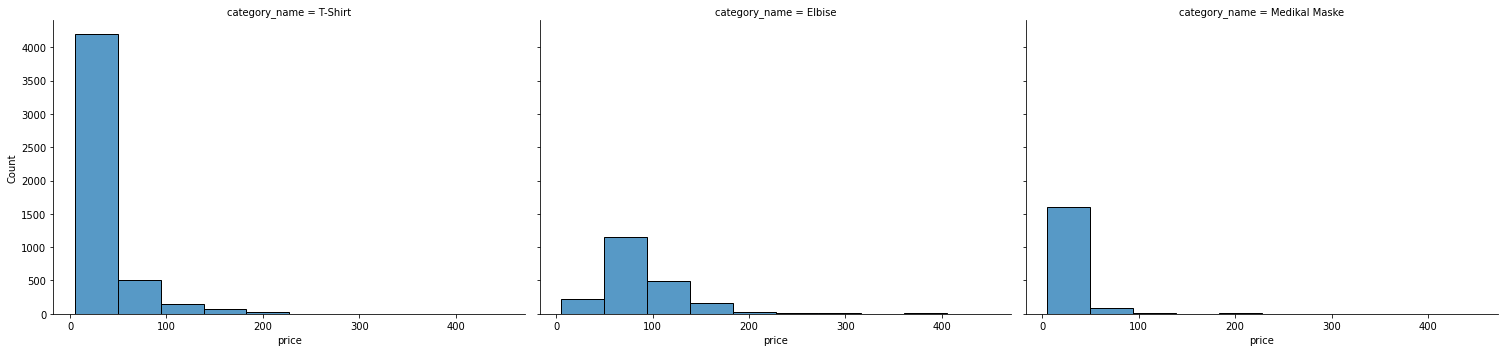

In [ ]:
# Visualazation of the price histogram for the most frequent 3 category names separately.
sns.displot(
  data=top_3_product_df,
  x="price",
  col="category_name",
  kind="hist",
  aspect=1.4,
  bins=10
)

Text(0.5, 1.0, 'Price Distrubutions of Top 3 Product ')

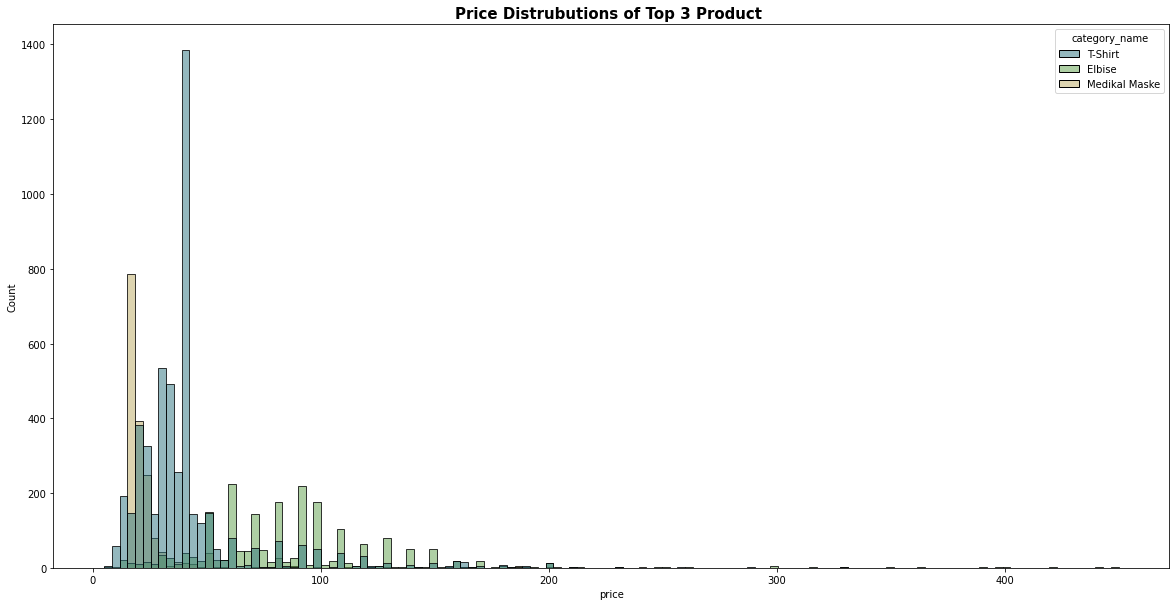

In [ ]:
# Visualazation of the price histogram for the most frequent 3 category names separately.
plt.figure(figsize=(20,10))
sns.histplot(x='price', data=top_3_product_df, palette='gist_earth',hue="category_name")
plt.title("Price Distrubutions of Top 3 Product ", fontsize=15,
                                             weight='bold')

**TASK-14E:** Please find the customer who has spent the highest amount of money.

In [ ]:
highest_spend = df.groupby("user_id")["price"].sum().sort_values(ascending=False)
highest_spend[0:1]

user_id
85115    84649.41
Name: price, dtype: float64

**TASK-14F:** Please find the customer(s) who has the most various brands, then categories and then business units.

In [ ]:
# Customer(s) who has the most various  brands
most_varios_brands = df.pivot_table(index="user_id",columns="brand_id",values="ImageLink",aggfunc="count") # Creates pivot table that include all brand and all user.
most_varios_brands.fillna(value=0,inplace=True) # Fill null values with 0
most_varios_brands[most_varios_brands>0]=1 # If the values is bigger than 0 that changes this value with 1 for summation all unique brands.
most_varios_brands.sum(axis=1).sort_values(ascending=False)[0:1] # Sums all rows then sorts the sum values in ascending order then gets first one.

user_id
85115    163.0
dtype: float64

In [ ]:
# Customer(s) who has the most various categories
most_varios_categories = df.pivot_table(index="user_id",columns="category_id",values="ImageLink",aggfunc="count") # Creates pivot table that include all category and all user.
most_varios_categories.fillna(value=0,inplace=True) # Fill null values with 0
most_varios_categories[most_varios_categories>0]=1 # If the values is bigger than 0 that changes this value with 1 for summation all unique category.
most_varios_categories.sum(axis=1).sort_values(ascending=False)[0:1] # Sums all rows then sorts the sum values in ascending order then gets first one.

user_id
85115    101.0
dtype: float64

In [ ]:
# Customer(s) who has the most various business units.
most_varios_business_unit = df.pivot_table(index="user_id",columns="business_unit",values="ImageLink",aggfunc="count") # Creates pivot table that include all business_unit and all user.
most_varios_business_unit.fillna(value=0,inplace=True) # Fill null values with 0
most_varios_business_unit[most_varios_business_unit>0]=1 # If the values is bigger than 0 that changes this value with 1 for summation all unique business_unit.
most_varios_business_unit.sum(axis=1).sort_values(ascending=False)[0:1] # Sums all rows then sorts the sum values in ascending order then gets first one.

user_id
85115    43.0
dtype: float64

**TASK-14G:** Please find the product that is sold at the highest level between 12.08.2020 and 15.08.2020

In [ ]:
df['partition_date'] = pd.to_datetime(df['partition_date']) # Changes object to datetime object

df[(df["partition_date"]<"2020-08-15")&(df["partition_date"]>"2020-08-12")]["price"].max() # Gets the highest level between 12.08.2020 and 15.08.2020

3924.0

**TASK-14H:** Please find the unisex product that has the highest price.

In [ ]:
df[df["gender"]=="Unisex"]["price"].max()

10678.26

**TASK-14I:** Please determine the product id that brought the highest amount of money/cash.

In [ ]:
df.groupby("productcontentid")["price"].sum().sort_values(ascending=False)[:1]

productcontentid
40929877    49524.0
Name: price, dtype: float64

**TASK-14J:** Please the number of different products that is for female and has the color codes 8, 11, or 9.

In [ ]:
df[(df["gender"]=="Kadın")&((df["color_id"]==8) | (df["color_id"]==11) | (df["color_id"]==9))].groupby("productcontentid")["productcontentid"].count()

productcontentid
85993       1
185906      3
189738      1
225300      2
226966      2
           ..
46718427    1
46769034    1
46778508    2
46859761    1
46899769    1
Name: productcontentid, Length: 1323, dtype: int64